# Imports

In [1]:
import anndata
import os
import scanpy as sc
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import anndata
import warnings
import sys
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable

from plotting import *

%matplotlib inline

# User Input

In [2]:
data_dir = '/data/peer/lpaddock/repos/multiome_QC_preprocessing/data'
out_dir = '/data/peer/lpaddock/repos/multiome_QC_preprocessing/results'

# Get sample names

In [3]:
samples = os.listdir(data_dir)
samples

['Sample_BCG_h1', 'Sample_BCG_h2']

# Load in anndatas

In [33]:
sample = 'Sample_BCG_h2'
sample_out_path = os.path.join(out_dir,sample)

In [34]:
rna_ad_prefilt = sc.read_h5ad(os.path.join(sample_out_path,'pre_filt_rna_adata.h5ad'))
rna_ad_crfilt = sc.read_h5ad(os.path.join(sample_out_path,'cr_filt_rna_adata.h5ad'))

In [35]:
atac_qcinfo = pd.read_csv(os.path.join(sample_out_path,'ArchR/pre_filt/export/cell_metadata.csv'),
                         index_col = 0)
rna_ad_prefilt.obs = rna_ad_prefilt.obs.join(atac_qcinfo.iloc[:,1:])
rna_ad_crfilt.obs = rna_ad_crfilt.obs.join(atac_qcinfo.iloc[:,1:])

In [36]:
kept_cells = rna_ad_prefilt.obs_names.isin(rna_ad_crfilt.obs_names)

In [58]:
import importlib
importlib.reload(plotting)

<module 'plotting' from '/lilac/data/peer/lpaddock/repos/multiome_QC_preprocessing/analysis/plotting.py'>

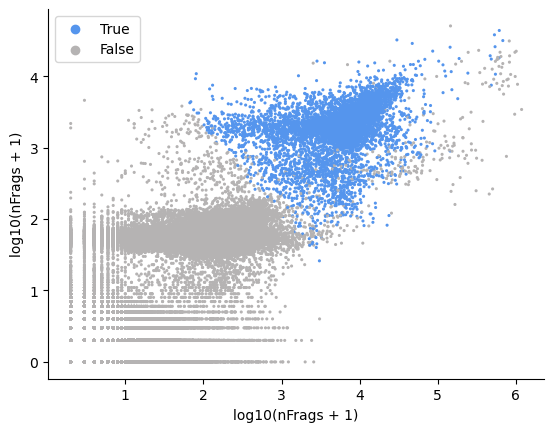

In [59]:
fig,ax = plt.subplots()
plotting.plt_scatter(rna_ad_prefilt,
                'nFrags',
                'total_counts',
                ax,
                hue = kept_cells,
                hue_order = [True, False],
                palette = {True: '#5595ed', False: '#b5b3b3'},
                log = True)

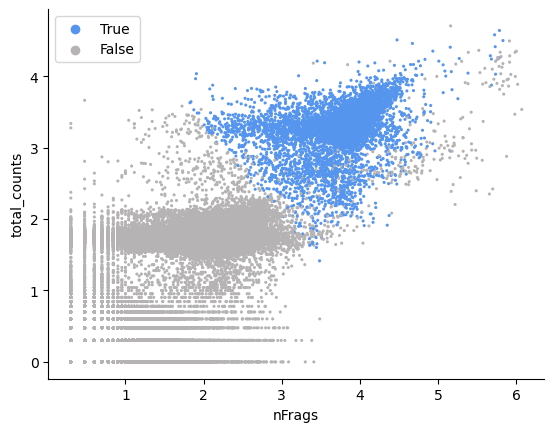

In [44]:
fig,ax = plt.subplots()
sns.scatterplot(x=np.log10(rna_ad_prefilt.obs['nFrags'] + 1),
                  y=np.log10(rna_ad_prefilt.obs['total_counts'] + 1),
                  hue = kept_cells,
                  s=5,
                  hue_order = [True, False],
                  linewidth = 0,
                  palette = {True: '#5595ed', False: '#b5b3b3'},
               ax = ax)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

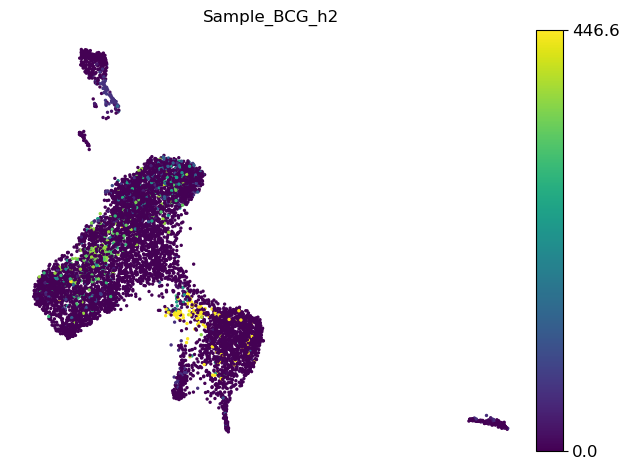

In [42]:
fig,ax = plt.subplots()
plt_umap_numerical(rna_ad_crfilt, 
                         'doublet_score', 
                         fig,
                         ax, 
                         title = sample)